In [2]:
import pandas as pd
import numpy as np

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/drop_missing_df.csv'
train_df = pd.read_csv(data_path)

# データ型の確認
print("Data types of each column:\n", train_df.dtypes)

# 数値型の列を取得
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:\n", numerical_cols)

Data types of each column:
 MSSubClass             int64
MSZoning              object
LotFrontage          float64
LotArea                int64
Street                object
                      ...   
MoSold_sin           float64
MoSold_cos           float64
YearsSinceBuilt        int64
YearsSinceRemod        int64
GarageInteraction      int64
Length: 87, dtype: object
Numerical columns:
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour',
       'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt',
       'GarageF

## キャッピングの適用

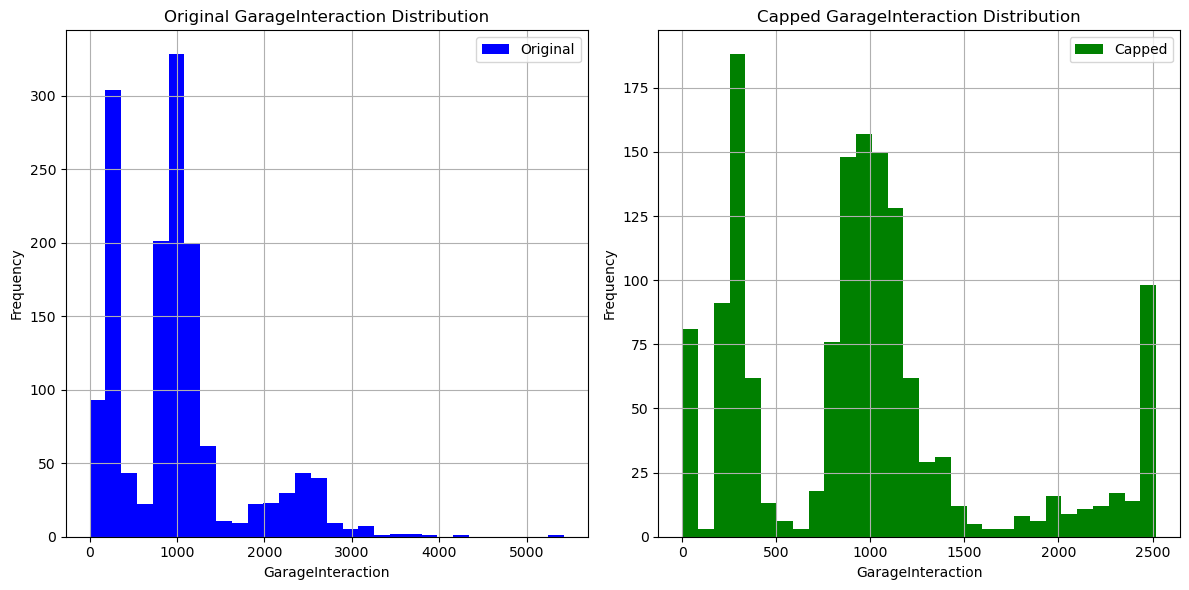

データ型を変換してデータを保存しました: /Users/hayakawakazue/Downloads/house_price/train/GarageInteraction_Capped.csv


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/GarageSize_Capped.csv'
df = pd.read_csv(data_path)

# GarageInteractionの算出
# df['GarageInteraction'] = df['GarageArea'] * df['GarageCars']

# キャッピングの範囲を決定
upper_bound = df['GarageInteraction'].quantile(0.95)  # 上位5%の値を上限に設定
lower_bound = df['GarageInteraction'].quantile(0.05)  # 下位5%の値を下限に設定

df['GarageInteraction_Capped'] = df['GarageInteraction'].clip(lower=lower_bound, upper=upper_bound)

# ヒストグラムの表示
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['GarageInteraction'].hist(bins=30, color='blue', label='Original')
plt.title('Original GarageInteraction Distribution')
plt.xlabel('GarageInteraction')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
df['GarageInteraction_Capped'].hist(bins=30, color='green', label='Capped')
plt.title('Capped GarageInteraction Distribution')
plt.xlabel('GarageInteraction')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# ディレクトリの確認と作成
save_dir = '/Users/hayakawakazue/Downloads/house_price/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 新しい特徴量を作成してデータを保存
df_path = os.path.join(save_dir, 'GarageInteraction_Capped.csv')  
df.to_csv(df_path, index=False)

print(f"データ型を変換してデータを保存しました: {df_path}")


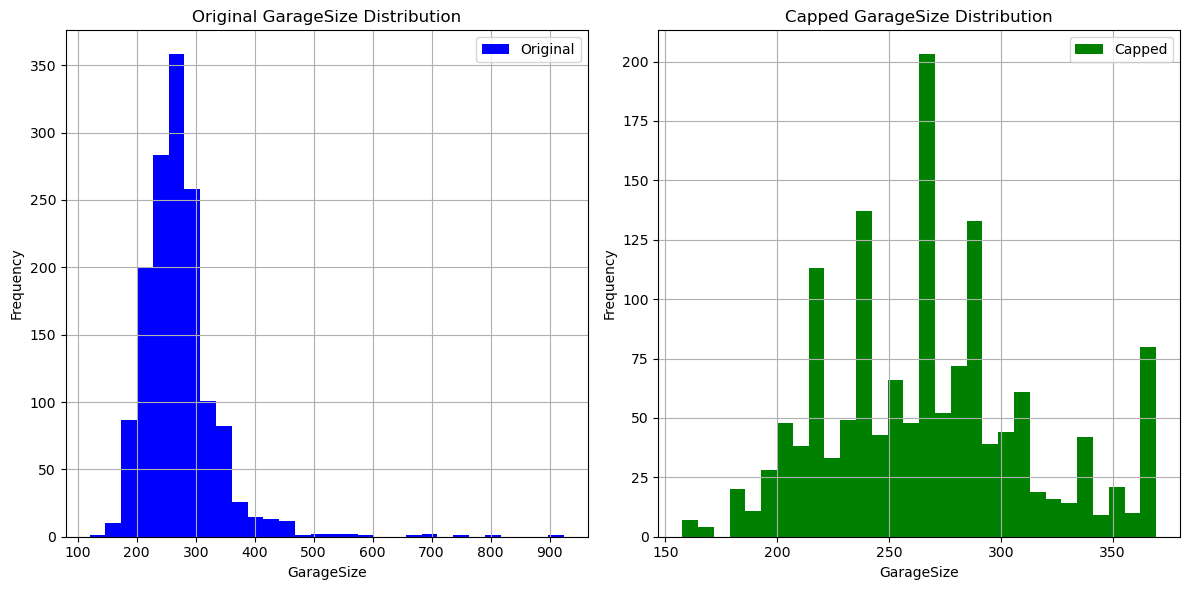

キャッピング後のデータを保存しました: /Users/hayakawakazue/Downloads/house_price/train/GarageSize_Capped.csv


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/TotalBath_Capped.csv'
df = pd.read_csv(data_path)

# GarageSizeのキャッピングの範囲を決定
Q1 = df['GarageSize'].quantile(0.25)
Q3 = df['GarageSize'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['GarageSize_Capped'] = df['GarageSize'].clip(lower=lower_bound, upper=upper_bound)

# ヒストグラムの表示
plt.figure(figsize=(12, 6))

# GarageSizeのオリジナルの分布
plt.subplot(1, 2, 1)
df['GarageSize'].hist(bins=30, color='blue', label='Original')
plt.title('Original GarageSize Distribution')
plt.xlabel('GarageSize')
plt.ylabel('Frequency')
plt.legend()

# GarageSizeのキャッピング後の分布
plt.subplot(1, 2, 2)
df['GarageSize_Capped'].hist(bins=30, color='green', label='Capped')
plt.title('Capped GarageSize Distribution')
plt.xlabel('GarageSize')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# ディレクトリの確認と作成
save_dir = '/Users/hayakawakazue/Downloads/house_price/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# キャッピング後のデータを保存
df_path = os.path.join(save_dir, 'GarageSize_Capped.csv')
df.to_csv(df_path, index=False)

print(f"キャッピング後のデータを保存しました: {df_path}")


In [41]:
# キャッピングされたGrLivAreaとSalePriceの相関係数を計算
correlation = df['GarageSize_Capped'].corr(df['SalePrice'])
print(f"The correlation coefficient between　GarageSize_Capped.csv and SalePrice is: {correlation:.6f}")

The correlation coefficient between　GarageSize_Capped.csv and SalePrice is: 0.025925


## GrLivAreaを対数変換してキャッピングを適用

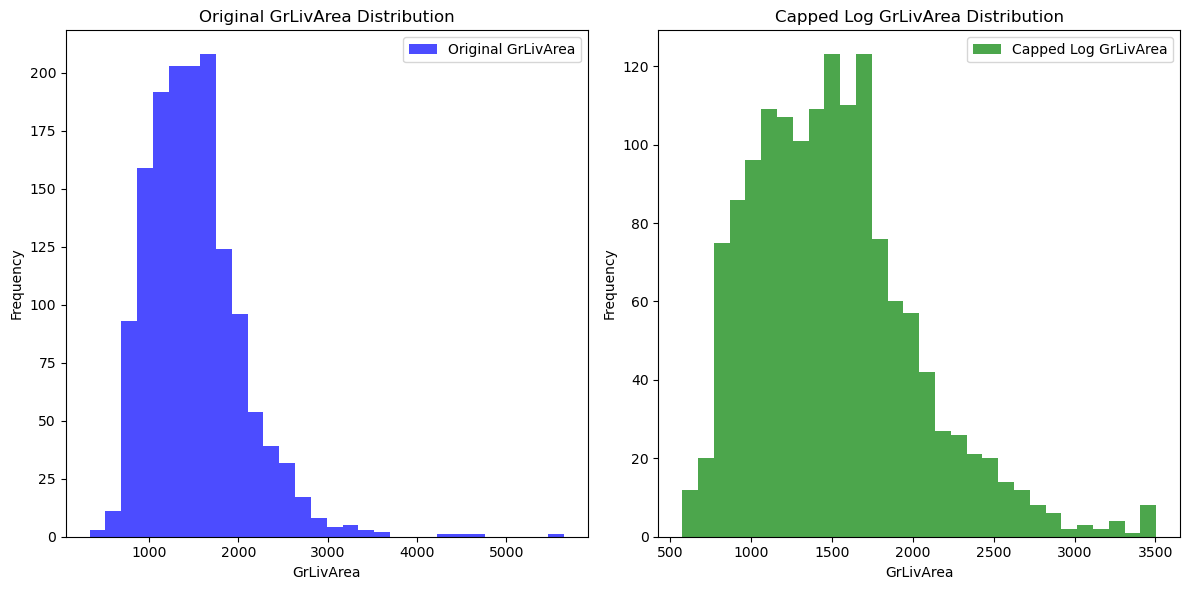

データ型を変換してデータを保存しました: /Users/hayakawakazue/Downloads/house_price/train/Log_GrLivArea_Capped.csv


In [20]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/2ndFlrSF_Capped.csv'
df = pd.read_csv(data_path)

# GrLivAreaに対する対数変換
df['log_GrLivArea'] = np.log(df['GrLivArea'])

# 対数変換されたGrLivAreaのキャッピング
Q1 = df['log_GrLivArea'].quantile(0.25)
Q3 = df['log_GrLivArea'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['capped_log_GrLivArea'] = df['log_GrLivArea'].clip(lower=lower_bound, upper=upper_bound)

# ヒストグラムの表示
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['GrLivArea'], bins=30, alpha=0.7, color='blue', label='Original GrLivArea')
plt.title('Original GrLivArea Distribution')
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df['capped_log_GrLivArea'].apply(np.exp), bins=30, alpha=0.7, color='green', label='Capped Log GrLivArea')
plt.title('Capped Log GrLivArea Distribution')
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# ディレクトリの確認と作成
save_dir = '/Users/hayakawakazue/Downloads/house_price/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 新しい特徴量を作成してデータを保存
df_path = os.path.join(save_dir, 'Log_GrLivArea_Capped.csv')  
df.to_csv(df_path, index=False)

print(f"データ型を変換してデータを保存しました: {df_path}")


## TotalBsmtSFを対数変換してキャッピングを適用

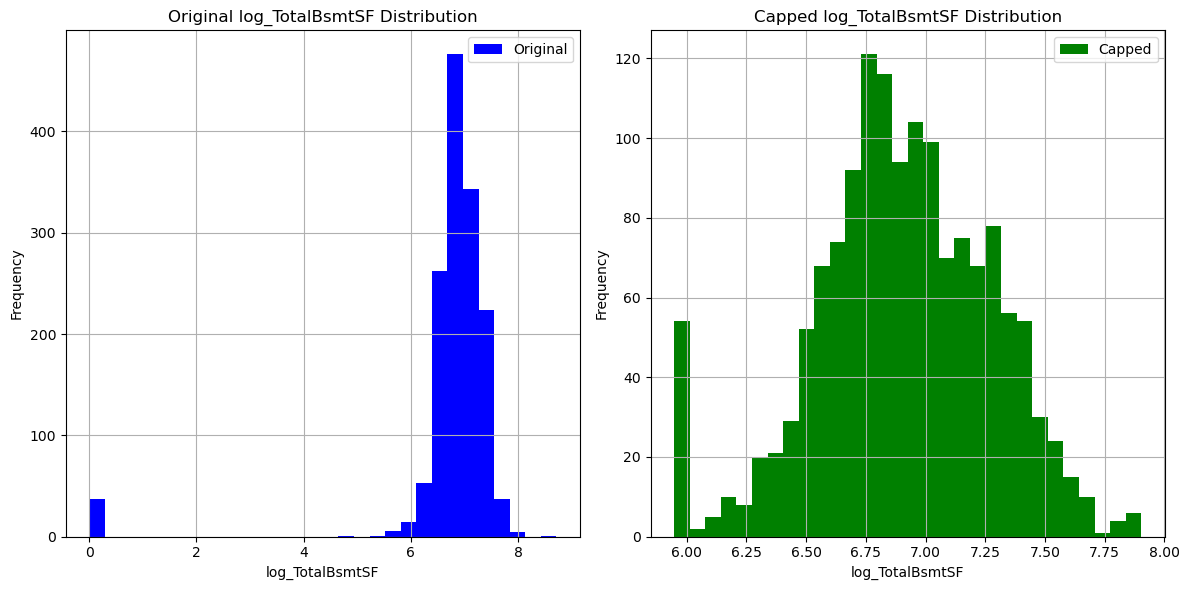

キャッピング後のデータを保存しました: /Users/hayakawakazue/Downloads/house_price/train/log_TotalBsmtSF_Capped.csv


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/BsmtFinSF1_Capped.csv'
df = pd.read_csv(data_path)

# 対数変換
df['log_TotalBsmtSF'] = np.log1p(df['TotalBsmtSF'])  # log1pを使用して0の値の処理

# キャッピングの範囲を決定
Q1 = df['log_TotalBsmtSF'].quantile(0.25)
Q3 = df['log_TotalBsmtSF'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['log_TotalBsmtSF_Capped'] = df['log_TotalBsmtSF'].clip(lower=lower_bound, upper=upper_bound)

# ヒストグラムの表示
plt.figure(figsize=(12, 6))

# オリジナルの分布
plt.subplot(1, 2, 1)
df['log_TotalBsmtSF'].hist(bins=30, color='blue', label='Original')
plt.title('Original log_TotalBsmtSF Distribution')
plt.xlabel('log_TotalBsmtSF')
plt.ylabel('Frequency')
plt.legend()

# キャッピング後の分布
plt.subplot(1, 2, 2)
df['log_TotalBsmtSF_Capped'].hist(bins=30, color='green', label='Capped')
plt.title('Capped log_TotalBsmtSF Distribution')
plt.xlabel('log_TotalBsmtSF')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# ディレクトリの確認と作成
save_dir = '/Users/hayakawakazue/Downloads/house_price/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# キャッピング後のデータを保存
df_path = os.path.join(save_dir, 'log_TotalBsmtSF_Capped.csv')
df.to_csv(df_path, index=False)

print(f"キャッピング後のデータを保存しました: {df_path}")


## 相関関係を計算する

In [10]:
# キャッピングされたGrLivAreaとSalePriceの相関係数を計算
correlation = df['log_TotalBsmtSF_Capped'].corr(df['SalePrice'])
print(f"The correlation coefficient between log_TotalBsmtSF_Capped and SalePrice is: {correlation:.6f}")

The correlation coefficient between log_TotalBsmtSF_Capped and SalePrice is: 0.603905


## 散布図の作成

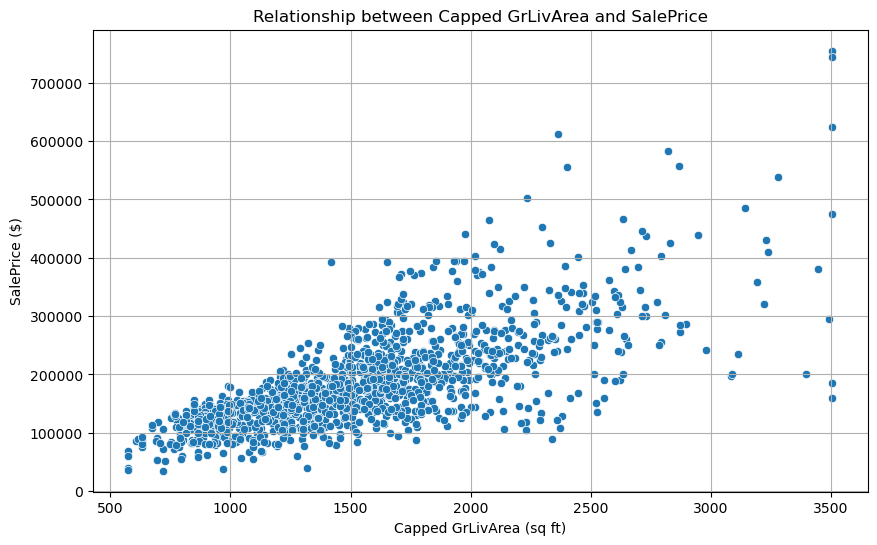

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/Log_GrLivArea_Capped.csv'
df = pd.read_csv(data_path)

# 対数スケールから元のスケールへの変換
df['GrLivArea_Capped'] = np.exp(df['capped_log_GrLivArea'])

# 散布図をプロット
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea_Capped', y='SalePrice', data=df)
plt.title('Relationship between Capped GrLivArea and SalePrice')
plt.xlabel('Capped GrLivArea (sq ft)')
plt.ylabel('SalePrice ($)')
plt.grid(True)
plt.show()


In [10]:
# キャッピングされたGrLivAreaとSalePriceの相関係数を計算
correlation = df['capped_log_GrLivArea'].corr(df['SalePrice'])
print(f"The correlation coefficient between Capped GrLivArea and SalePrice is: {correlation:.2f}")


The correlation coefficient between Capped GrLivArea and SalePrice is: 0.70


## 残差分析とQQプロットモデルの評価

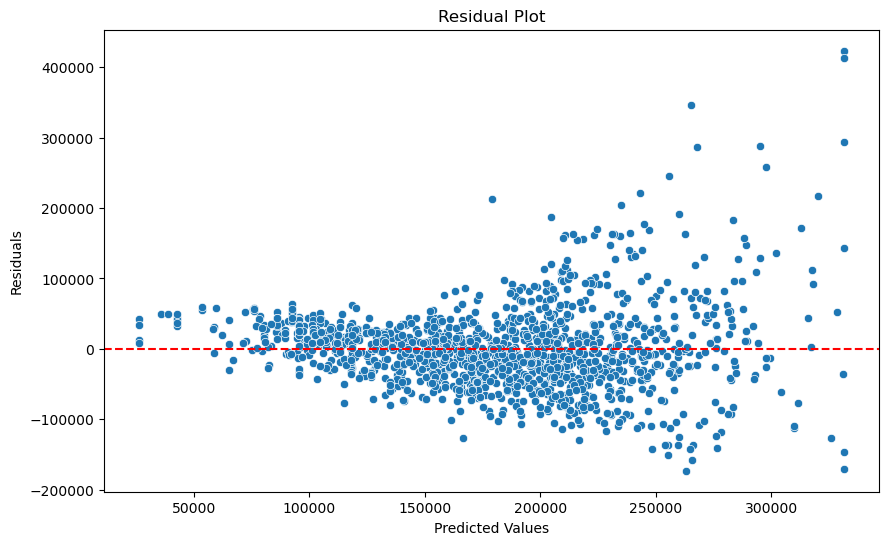

MSE: 3257774610.189044


In [7]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# 保存されたデータの読み込み
df = pd.read_csv('/Users/hayakawakazue/Downloads/house_price/train/GrLivArea_Capped.csv')

# 線形回帰モデルの設定とフィッティング
model = LinearRegression()
X = df[['capped_log_GrLivArea']]  # 説明変数
y = df['SalePrice']               # 応答変数
model.fit(X, y)

# 予測と残差の計算
predictions = model.predict(X)
residuals = y - predictions

# 残差プロット
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# 残差の評価（MSEの計算）
mse = mean_squared_error(y, predictions)
print(f'MSE: {mse}')


# 3 上限値または下限値にクリップする

       MSSubClass  LotFrontage       LotArea    LotShape  Utilities  \
count  362.000000   362.000000    362.000000  362.000000      362.0   
mean    49.240331    79.080110  12271.222721    2.364641        1.0   
std     29.356727    18.264498   3727.437948    0.657089        0.0   
min     20.000000    37.500000   3527.375000    0.000000        1.0   
25%     20.000000    69.000000   9924.500000    2.000000        1.0   
50%     60.000000    76.500000  11775.500000    2.000000        1.0   
75%     60.000000    90.000000  14189.250000    3.000000        1.0   
max    190.000000   121.500000  20586.375000    3.000000        1.0   

        LandSlope  OverallQual  OverallCond    YearBuilt  YearRemodAdd  ...  \
count  362.000000   362.000000        362.0   362.000000    362.000000  ...   
mean     1.900552     7.638122          5.0  1996.339779   2000.741713  ...   
std      0.350780     0.929799          0.0    12.745452      7.430863  ...   
min      0.000000     5.500000          5.0 

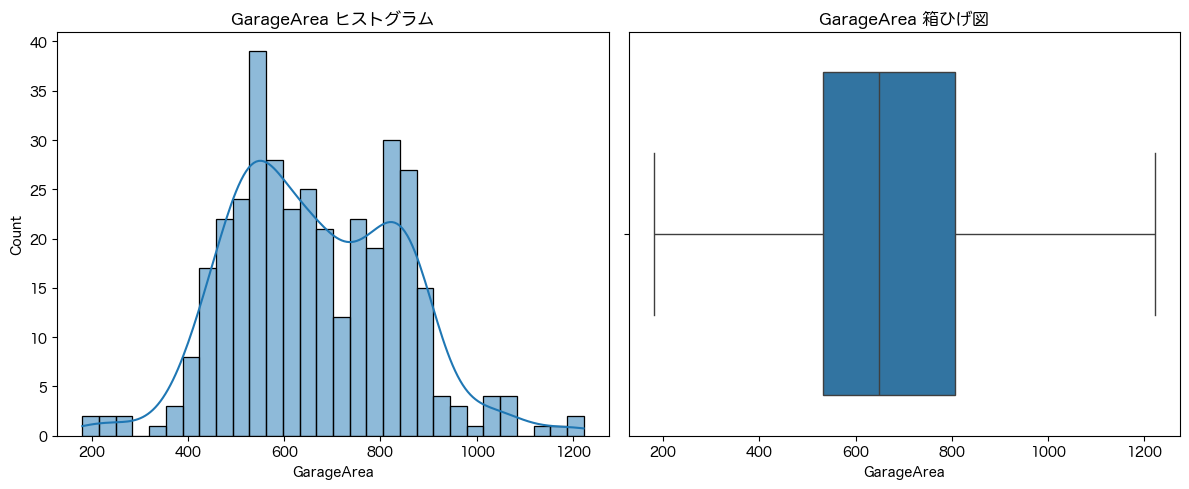

データ型を変換してデータを保存しました: /Users/hayakawakazue/Downloads/house_price/train/high/high_price17.csv


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/high/high_price16.csv'
train_data = pd.read_csv(data_path)

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

# 数値型の列を確認
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns

# 例: 数値変数の異常値を確認
col = 'GarageArea'
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

lower_bound, upper_bound = detect_outliers_iqr(train_data, col)

# 異常値を上限値または下限値にクリップする
train_data[col] = np.clip(train_data[col], lower_bound, upper_bound)

# 結果の確認
print(train_data.describe())

# ヒストグラムと箱ひげ図を再作成
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(train_data[col].replace([np.inf, -np.inf], np.nan).dropna(), bins=30, kde=True, ax=axes[0])
axes[0].set_title(f'{col} ヒストグラム')
sns.boxplot(x=train_data[col].replace([np.inf, -np.inf], np.nan).dropna(), ax=axes[1])
axes[1].set_title(f'{col} 箱ひげ図')
plt.tight_layout()
plt.show()

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/house_price/train/high'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 新しい特徴量を作成してデータを保存
train_data_path = os.path.join(save_dir, 'high_price17.csv')
train_data.to_csv(train_data_path, index=False)

print(f"データ型を変換してデータを保存しました: {train_data_path}")


# 4 必要に応じて対数変換を適用する

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


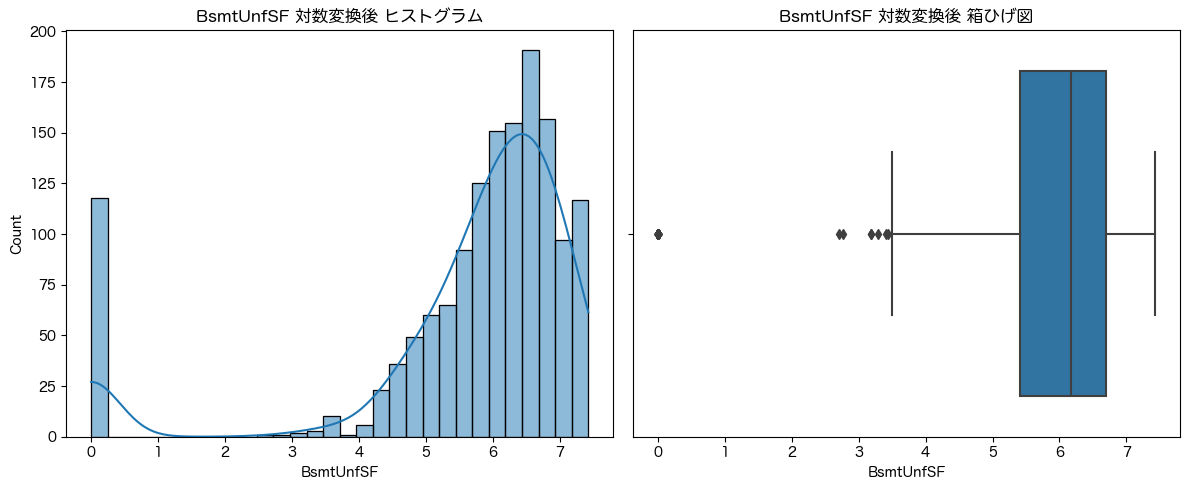

データ型を変換してデータを保存しました: /Users/hayakawakazue/Downloads/house_price/train/train8_log_transform.csv


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/train8.csv'
train_data = pd.read_csv(data_path)

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

# 対数変換を適用する関数
def log_transform(data, column):
    data[column] = np.log1p(data[column])  # log1pはlog(1 + x)を計算します

# 対数変換する特徴量を定義する
col = 'BsmtUnfSF'
log_transform(train_data, col)

# 対数変換後のヒストグラムと箱ひげ図を作成
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(train_data[col].replace([np.inf, -np.inf], np.nan).dropna(), bins=30, kde=True, ax=axes[0])
axes[0].set_title(f'{col} 対数変換後 ヒストグラム')
sns.boxplot(x=train_data[col].replace([np.inf, -np.inf], np.nan).dropna(), ax=axes[1])
axes[1].set_title(f'{col} 対数変換後 箱ひげ図')
plt.tight_layout()
plt.show()

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/house_price/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 新しい特徴量を作成してデータを保存
train_data_path = os.path.join(save_dir, 'train8_log_transform.csv')
train_data.to_csv(train_data_path, index=False)

print(f"データ型を変換してデータを保存しました: {train_data_path}")


# 異常値を中央値で置き換える

        MSSubClass  LotFrontage       LotArea     LotShape    Utilities  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     56.897260    68.793836   9282.247260     2.591781     0.999315   
std      42.300571    13.846137   3120.530702     0.582296     0.026171   
min      20.000000    32.000000   1491.000000     0.000000     0.000000   
25%      20.000000    60.000000   7560.000000     2.000000     1.000000   
50%      50.000000    69.000000   9478.000000     3.000000     1.000000   
75%      70.000000    75.000000  11107.250000     3.000000     1.000000   
max     190.000000   107.000000  17671.000000     3.000000     1.000000   

         LandSlope  OverallQual  OverallCond    YearBuilt  YearRemodAdd  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  ...   
mean      1.937671     6.099315     5.575342  1971.721233   1984.865753  ...   
std       0.276232     1.382997     1.112799    29.506258     20.645407  ...   
min 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


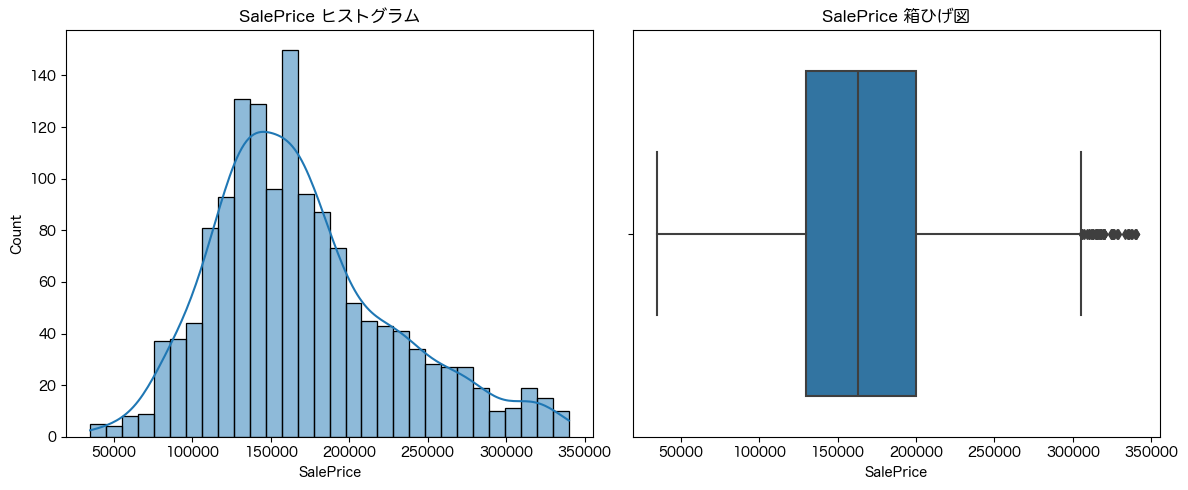

データ型を変換してデータを保存しました: /Users/hayakawakazue/Downloads/house_price/train/train19.csv


In [23]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/train18.csv'
train_data = pd.read_csv(data_path)

# LotFrontageの異常値を検出して置き換え
col = 'SalePrice'
def detect_and_replace_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_value = data[column].median()
    if data[column].dtype == 'int64':
        median_value = int(median_value)
    data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = median_value

# 異常値の置き換えを実施
detect_and_replace_outliers(train_data, col)

# 結果の確認
print(train_data.describe())

# ヒストグラムと箱ひげ図を作成
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(train_data[col].replace([np.inf, -np.inf], np.nan).dropna(), bins=30, kde=True, ax=axes[0])
axes[0].set_title(f'{col} ヒストグラム')
sns.boxplot(x=train_data[col].replace([np.inf, -np.inf], np.nan).dropna(), ax=axes[1])
axes[1].set_title(f'{col} 箱ひげ図')
plt.tight_layout()
plt.show()

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/house_price/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 新しいデータを保存
train_data_path = os.path.join(save_dir, 'train19.csv')
train_data.to_csv(train_data_path, index=False)

print(f"データ型を変換してデータを保存しました: {train_data_path}")


# 対数変換をとる

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


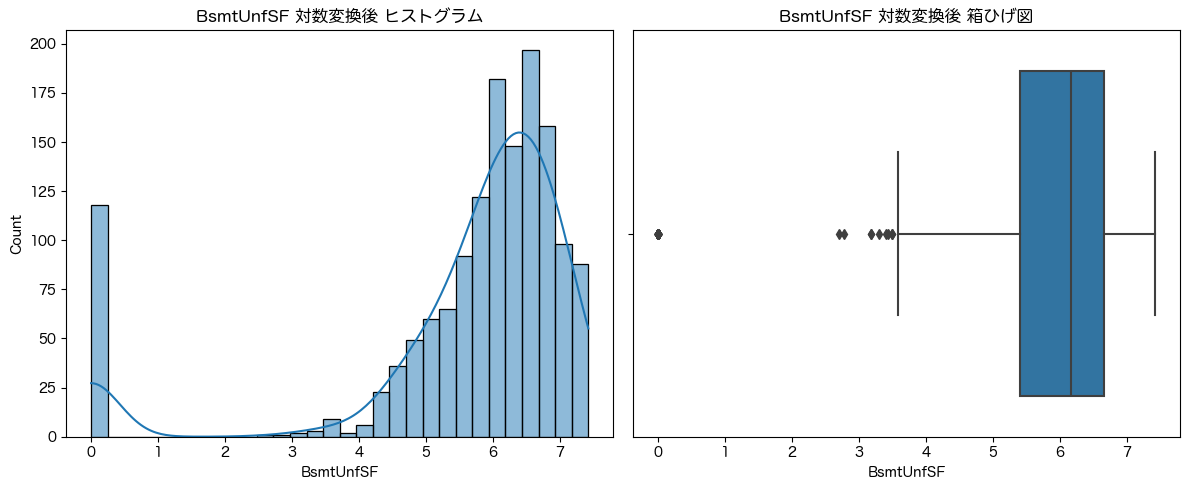

データ型を変換してデータを保存しました: /Users/hayakawakazue/Downloads/house_price/train/train8_log_transform.csv


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 日本語フォントの設定
plt.rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro']  # Mac用
plt.rcParams['axes.unicode_minus'] = False

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/train8.csv'
train_data = pd.read_csv(data_path)

# 対数変換を適用する関数
def log_transform(data, column):
    data[column] = np.log1p(data[column])  # log1pはlog(1 + x)を計算します

# 対数変換を適用する列
col = 'BsmtUnfSF'
log_transform(train_data, col)

# 対数変換後のヒストグラムと箱ひげ図を作成
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(train_data[col].replace([np.inf, -np.inf], np.nan).dropna(), bins=30, kde=True, ax=axes[0])
axes[0].set_title(f'{col} 対数変換後 ヒストグラム')
sns.boxplot(x=train_data[col].replace([np.inf, -np.inf], np.nan).dropna(), ax=axes[1])
axes[1].set_title(f'{col} 対数変換後 箱ひげ図')
plt.tight_layout()
plt.show()

# ディレクトリが存在するか確認し、存在しない場合は作成
save_dir = '/Users/hayakawakazue/Downloads/house_price/train'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# 新しい特徴量を作成してデータを保存
train_data_path = os.path.join(save_dir, 'train8_log_transform.csv')
train_data.to_csv(train_data_path, index=False)

print(f"データ型を変換してデータを保存しました: {train_data_path}")
